<a href="https://colab.research.google.com/github/faressoltani55/TunisianDialectSentimentAnalysis/blob/main/Tunisian_Dialect_Sentiment_Analysis_Model" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#4/1AY0e-g78_yQ6WVxOlZHbWuqGdYx7p2M7dJ0lE3-zvnulX8d4Ge08dg8xakk

In [ ]:
downloaded = drive.CreateFile({'id':'1ewAp60aj9AgC0PqPMBuYBwwVO9peaFTR'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Train.csv')
downloaded = drive.CreateFile({'id':'1i5WfgpAlGYp33k3Pxwq3J02kJiPsilBZ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Test.csv')

In [ ]:
train_ds = pd.read_csv('Train.csv')
test_ds = pd.read_csv('Test.csv')

In [ ]:
print(train_ds.shape)
print(test_ds.shape)

(70000, 3)
(30000, 2)


In [ ]:
print(train_ds.head())
print(test_ds.head())

        ID                                               text  label
0  13P0QT0  3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...     -1
1  SKCLXCJ       cha3eb fey9elkoum menghir ta7ayoul ou kressi     -1
2  V1TVXIJ  bereau degage nathef ya slim walahi ya7chiw fi...     -1
3  U0TTYY8                                          ak slouma      1
4  68DX797  entom titmanou lina a7na 3iid moubarik a7na ch...     -1
        ID                                               text
0  2DDHQW9   barcha aaindou fiha hak w barcha teflim kadhalik
1  5HY6UEY                               ye gernabou ye 9a7ba
2  ATNVUJX                     saber w barra rabbi m3ak 5ouya
3  Q9XYVOQ               cha3ébbb ta7aaaaannnnnnnnnnn tfouuhh
4  TOAHLRH  rabi y5alihoulek w yfar7ek bih w inchallah itc...


In [ ]:
training_leb = []
for l in train_ds.label:
    i = 1;
    if l == -1:
        i=0
    training_leb.append(i)

train_ds.drop(columns = ['label'], inplace = True)
train_ds['label'] = training_leb

In [ ]:
print(train_ds.head())
print(test_ds.head())

        ID                                               text  label
0  13P0QT0  3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...      0
1  SKCLXCJ       cha3eb fey9elkoum menghir ta7ayoul ou kressi      0
2  V1TVXIJ  bereau degage nathef ya slim walahi ya7chiw fi...      0
3  U0TTYY8                                          ak slouma      1
4  68DX797  entom titmanou lina a7na 3iid moubarik a7na ch...      0
        ID                                               text
0  2DDHQW9   barcha aaindou fiha hak w barcha teflim kadhalik
1  5HY6UEY                               ye gernabou ye 9a7ba
2  ATNVUJX                     saber w barra rabbi m3ak 5ouya
3  Q9XYVOQ               cha3ébbb ta7aaaaannnnnnnnnnn tfouuhh
4  TOAHLRH  rabi y5alihoulek w yfar7ek bih w inchallah itc...


In [ ]:
import re
import string
import unicodedata

def lower_text(text):
    return text.lower()

def remove_emails(x):
     return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)


def remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

def remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x


def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
train_ds["text"] = train_ds.text.map(lower_text)
test_ds["text"] = test_ds.text.map(lower_text)

train_ds["text"] = train_ds.text.map(remove_emails)
train_ds["text"] = train_ds.text.map(remove_urls)
train_ds["text"] = train_ds.text.map(remove_rt)
train_ds["text"] = train_ds.text.map(remove_special_chars)
train_ds["text"] = train_ds.text.map(remove_accented_chars)

test_ds["text"] = test_ds.text.map(remove_emails)
test_ds["text"] = test_ds.text.map(remove_urls)
test_ds["text"] = test_ds.text.map(remove_rt)
test_ds["text"] = test_ds.text.map(remove_special_chars)
test_ds["text"] = test_ds.text.map(remove_accented_chars)

In [ ]:
print(train_ds.head())
print(test_ds.head())

        ID                                               text  label
0  13P0QT0  3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...      0
1  SKCLXCJ       cha3eb fey9elkoum menghir ta7ayoul ou kressi      0
2  V1TVXIJ  bereau degage nathef ya slim walahi ya7chiw fi...      0
3  U0TTYY8                                          ak slouma      1
4  68DX797  entom titmanou lina a7na 3iid moubarik a7na ch...      0
        ID                                               text
0  2DDHQW9   barcha aaindou fiha hak w barcha teflim kadhalik
1  5HY6UEY                               ye gernabou ye 9a7ba
2  ATNVUJX                     saber w barra rabbi m3ak 5ouya
3  Q9XYVOQ               cha3ebbb ta7aaaaannnnnnnnnnn tfouuhh
4  TOAHLRH  rabi y5alihoulek w yfar7ek bih w inchallah itc...


In [ ]:
from itertools import groupby
def reshape_words(text):
    words = text.split()
    for word in words:
        i = words.index(word)
        chars = [ch for ch in words[i]]
        chars = [x[0] for x in groupby(chars)]
        words[i] = "".join(chars)
    return " ".join(words)

train_ds["text"] = train_ds.text.map(reshape_words)
test_ds["text"] = test_ds.text.map(reshape_words)

In [ ]:
test_ds.head()

,ID,text
0,2DDHQW9,barcha aindou fiha hak w barcha teflim kadhalik
1,5HY6UEY,ye gernabou ye 9a7ba
2,ATNVUJX,saber w bara rabi m3ak 5ouya
3,Q9XYVOQ,cha3eb ta7an tfouh
4,TOAHLRH,rabi y5alihoulek w yfar7ek bih w inchalah itch...


In [ ]:
from collections import Counter

# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

# Count unique words
def counter_word_from_list(text_col):
    count = Counter()
    for text in text_col:
        for word in text.split():
            count[word] += 1
    return count

In [ ]:
def remove_special(text):
  filtered_words = [word for word in text.split()]
  for i in range(len(filtered_words)):
    chars = [char for char in filtered_words[i]]
    for j in range(len(chars)):
      if chars[j] == "1" or chars[j] == "2":
        chars[j] = "a"
      elif chars[j] == "4":
        chars[j] = "dh"
      elif chars[j] == "5":
        chars[j] = "kh"
      elif chars[j] == "7":
        chars[j] = "h"
      elif chars[j] == "8":
        chars[j] = "gh"
      elif chars[j] == "9":
        chars[j] = "k"
    filtered_words[i] = "".join(chars)
  return " ".join(filtered_words)

train_ds["text"] = train_ds.text.map(remove_special)
test_ds["text"] = test_ds.text.map(remove_special)

In [ ]:
def regroup_words(text):
    text = text.lower()
    filtered_words = [word for word in text.split()]
    for i in range(len(filtered_words)):
      if filtered_words[i] == "ou" or filtered_words[i] == "we" or filtered_words[i] == "wa" or filtered_words[i] == "wou":
        filtered_words[i] = "w"
      elif filtered_words[i] == "mn" or filtered_words[i] == "min":
        filtered_words[i] = "men"
      elif filtered_words[i] == "eni" or filtered_words[i] == "ena" or filtered_words[i] == "ani":
        filtered_words[i] = "ana"
      elif filtered_words[i] == "elli" or filtered_words[i] == "illi" or filtered_words[i] == "ili" or filtered_words[i] == "l" or filtered_words[i] == "le" or filtered_words[i] == "il" or filtered_words[i] == "el":
        filtered_words[i] = "li"
      elif filtered_words[i] == "alah":
        filtered_words[i] = "allah"
      elif filtered_words[i] == "m3k":
        filtered_words[i] = "m3ak"
      elif filtered_words[i] == "f" or filtered_words[i] == "fe" or filtered_words[i] == "fel" or filtered_words[i] == "fil":
        filtered_words[i] = "fi"
      elif filtered_words[i] == "bil" or filtered_words[i] == "b" or filtered_words[i] == "be":
        filtered_words[i] = "bel"
      elif filtered_words[i] == "lek":
        filtered_words[i] = "lik"
      elif filtered_words[i] == "asba" or filtered_words[i] == "3sba":
        filtered_words[i] = "3asba"
    return " ".join(filtered_words)

train_ds["text"] = train_ds.text.map(regroup_words)
test_ds["text"] = test_ds.text.map(regroup_words)

In [ ]:
counter = counter_word(train_ds.text)

In [ ]:
train_ds.head()

,ID,text,label
0,13P0QT0,3asba lik w li seim riahi w 3asba li ca,0
1,SKCLXCJ,cha3eb feykelkoum menghir tahayoul w kresi,0
2,V1TVXIJ,bereau degage nathef ya slim walahi yahchiw fi...,0
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina ahna 3id moubarik ahna cha...,0


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
frstop = stopwords.words('french')

def remove_stopwords(text):
    text = text.lower()
    filtered_words = [word for word in text.split() if word not in frstop]
    return " ".join(filtered_words)

def lower_text(text):
    return text.lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_ds["text"] = train_ds.text.map(remove_stopwords)
test_ds["text"] = test_ds.text.map(remove_stopwords)

In [ ]:
print(train_ds.head())
print(test_ds.head())

        ID                                               text  label
0  13P0QT0            3asba lik w li seim riahi w 3asba li ca      0
1  SKCLXCJ         cha3eb feykelkoum menghir tahayoul w kresi      0
2  V1TVXIJ  bereau degage nathef ya slim walahi yahchiw fi...      0
3  U0TTYY8                                          ak slouma      1
4  68DX797  entom titmanou lina ahna 3id moubarik ahna cha...      0
        ID                                               text
0  2DDHQW9    barcha aindou fiha hak w barcha teflim kadhalik
1  5HY6UEY                               ye gernabou ye kahba
2  ATNVUJX                      saber w bara rabi m3ak khouya
3  Q9XYVOQ                                 cha3eb tahan tfouh
4  TOAHLRH  rabi ykhalihoulek w yfarhek bih w inchalah itc...


In [ ]:
def remove_useless(text):
    filtered_words = [word for word in text.split() if len(word)>3 or word == "nik" or word == "si" or word == "ok" or word == "het"]
    return " ".join(filtered_words)

In [ ]:
train_ds["text"] = train_ds.text.map(remove_useless)
test_ds["text"] = test_ds.text.map(remove_useless)

In [ ]:
all_sentences = list(train_ds.text) + list(test_ds.text)
counter = counter_word_from_list(all_sentences)
counter.most_common()

[('rabi', 11928),
 ('slim', 10183),
 ('si', 5202),
 ('bravo', 5044),
 ('bech', 4587),
 ('allah', 4564),
 ('m3ak', 4246),
 ('slouma', 3320),
 ('hata', 2429),
 ('barcha', 2422),
 ('mala', 2272),
 ('enti', 2219),
 ('tounes', 2207),
 ('khir', 2180),
 ('mabrouk', 2139),
 ('3ala', 2125),
 ('brabi', 2082),
 ('tawa', 2065),
 ('m3alem', 2043),
 ('dima', 1998),
 ('riahi', 1944),
 ('nchalah', 1846),
 ('ahna', 1828),
 ('haja', 1822),
 ('bara', 1806),
 ('wala', 1804),
 ('mouch', 1764),
 ('chay', 1760),
 ('club', 1659),
 ('walah', 1657),
 ('3lik', 1635),
 ('inchalah', 1487),
 ('chkoun', 1447),
 ('kima', 1410),
 ('haka', 1385),
 ('rajel', 1299),
 ('inti', 1240),
 ('mta3', 1224),
 ('fama', 1200),
 ('lkol', 1167),
 ('president', 1100),
 ('cha3b', 1040),
 ('howa', 1029),
 ('flous', 1029),
 ('khater', 1028),
 ('fiha', 904),
 ('tunis', 894),
 ('bled', 876),
 ('belehi', 871),
 ('3lina', 867),
 ('merci', 849),
 ('tounis', 826),
 ('dawla', 816),
 ('hedha', 803),
 ('rana', 794),
 ('jam3iya', 788),
 ('3lih', 7

In [ ]:
len(counter)

146106

In [ ]:
num_unique_words = len(counter)

In [ ]:
train_ds = train_ds.sample(frac=1).reset_index(drop=True)
cut = 60000
test_reviews = train_ds.text[cut:].to_numpy()
test_labels = train_ds.label[cut:].to_numpy()
train_reviews = train_ds.text[:cut].to_numpy()
train_labels = train_ds.label[:cut].to_numpy()

In [ ]:
train_reviews.shape, test_reviews.shape

((60000,), (10000,))

In [ ]:
trunc_type='post'
oov_tok = "<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_unique_words, oov_token=oov_tok)
tokenizer.fit_on_texts(train_reviews)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_reviews)

In [ ]:
print(train_reviews[10:15])
print(train_sequences[10:15])

['patron m3adabhom rois'
 'tared 3lena lbenzarti wnehlna barcha amarek m3ak flkoumita jiblna entreneur kbir kima wyzina mlaflam mta3ak'
 'nice photoshop nahdha'
 'chika groupes hethi ynajim yaemel haja wakt jena maenech jouerete equipe ferga chaksitou kwia yaeref ywasel mesage jouerete'
 'winou']
[[78, 10460, 18261], [709, 8686, 5186, 30306, 10, 30307, 8, 30308, 10461, 927, 89, 35, 30309, 30310, 8687], [633, 6476, 383], [13261, 13262, 187, 3991, 30311, 26, 201, 2571, 30312, 3705, 258, 5759, 30313, 5187, 30314, 3706, 668, 3705], [485]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 30

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")

train_padded.shape

(60000, 30)

In [ ]:
model = keras.models.Sequential()

model.add(layers.Embedding(num_unique_words, 64, input_length=max_length))

model.add(layers.Bidirectional(layers.LSTM(64)))

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 64)            9350784   
_________________________________________________________________
bidirectional (Bidirectional (None, 30, 128)           66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 9,523,969
Trainable params: 9,523,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9):
      print("\nReached 93% accuracy")
      self.model.stop_training = True
callback = myCallback()

In [ ]:
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
def sample_data():
    test_sequences = tokenizer.texts_to_sequences(test_reviews)
    test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")
    return test_padded, test_labels

In [ ]:
history = model.fit(train_padded,train_labels,epochs=3,validation_data=(sample_data()), callbacks=[callback])

Epoch 1/20
1875/1875 [==============================] - 319s 167ms/step - loss: 0.4754 - accuracy: 0.7594 - val_loss: 0.3853 - val_accuracy: 0.8230
Epoch 2/20
1875/1875 [==============================] - 311s 166ms/step - loss: 0.1856 - accuracy: 0.9294 - val_loss: 0.4418 - val_accuracy: 0.8076
Epoch 3/20
1875/1875 [==============================] - 313s 167ms/step - loss: 0.0818 - accuracy: 0.9712 - val_loss: 0.5751 - val_accuracy: 0.8029
Epoch 4/20
1875/1875 [==============================] - 311s 166ms/step - loss: 0.0499 - accuracy: 0.9823 - val_loss: 0.6345 - val_accuracy: 0.7959
Epoch 5/20
1875/1875 [==============================] - 312s 166ms/step - loss: 0.0335 - accuracy: 0.9868 - val_loss: 0.9054 - val_accuracy: 0.7945
Epoch 6/20
1875/1875 [==============================] - 312s 166ms/step - loss: 0.0262 - accuracy: 0.9891 - val_loss: 0.9336 - val_accuracy: 0.7923
Epoch 7/20
1875/1875 [==============================] - 313s 167ms/step - loss: 0.0221 - accuracy: 0.9909 - val_

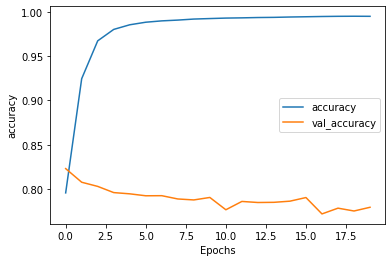

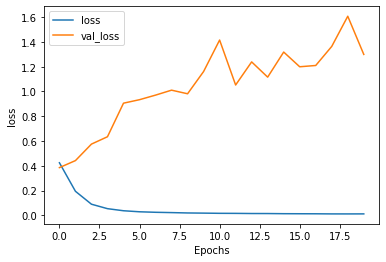

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
def preprocess(text):
    text = remove_url(text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    text = remove_useless(text)
    text = lemmatize_text(text)
    text = negate_words(text)
    sequences = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")
    return padded

In [ ]:
def predict(padded):
    predictions = [1 if p> 0.4 else -1 for p in model.predict(padded)]
    return predictions

In [ ]:
def preprocess_many(texts):
    for text in texts:
        i = texts.index(text)
        text = lower_text(text)
        text = remove_emails(text)
        text = remove_urls(text)
        text = remove_rt(text)
        text = remove_special_chars(text)
        text = remove_accented_chars(text)
        text = reshape_words(text)
        text = regroup_words(text)
        text = remove_special(text)
        text = remove_stopwords(text)
        text = remove_useless(text)
        texts[i] = text
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")
    return padded

In [ ]:
texts = list(test_ds.text[:])
preprocessed = preprocess_many(texts)

In [ ]:
predictions = predict(preprocessed)

In [ ]:
test_ds.shape

(30000, 2)

In [ ]:
print(texts[3505:3510])
print(predictions[3505:3510])

['maneha thebou tkoulou edhoukom khir lotfi ebdeli zayed chab mounefak', 'nik omek slim ryehi allah yahrak weldik khamej latbereklek khrebt club', 'rabi elahena behweyjina moch bilebachar machakelha andi mankolek', 'theb tamel lkhir emchi ahya lfakira mouch alina facebok malem', 'khsara tmanit nkoun nachit fara fousana wileyt kaserine wmajmoua kbira andha thika kbira mastajabtouch lina nitak jihawi nitak watani baid aladid mina albarkiyet']
[-1, -1, 1, 1, -1]


In [ ]:
submission = pd.DataFrame({"ID": test_ds["ID"], "label": predictions})

In [ ]:
submission.head()

,ID,label
0,2DDHQW9,1
1,5HY6UEY,-1
2,ATNVUJX,1
3,Q9XYVOQ,-1
4,TOAHLRH,1


In [ ]:
submission.to_csv('34.csv', index = False)